In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv('test.csv')
df2=pd.read_csv('train.csv')

In [3]:
df=df1.append(df2)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN


In [5]:
df.shape

(981, 13)

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [8]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [9]:
df.isnull().sum()/len(df)*100

Loan_ID               0.000000
Gender                2.446483
Married               0.305810
Dependents            2.548420
Education             0.000000
Self_Employed         5.606524
ApplicantIncome       0.000000
CoapplicantIncome     0.000000
LoanAmount            2.752294
Loan_Amount_Term      2.038736
Credit_History        8.053007
Property_Area         0.000000
Loan_Status          37.410805
dtype: float64

In [10]:
mode_sf_emp=df['Self_Employed'].mode()

In [11]:
mode_sf_emp

0    No
Name: Self_Employed, dtype: object

In [12]:
df['Self_Employed']=df['Self_Employed'].fillna(method='ffill')

In [13]:
mode_ln_st=df['Loan_Status'].mode()
mode_ln_st

0    Y
Name: Loan_Status, dtype: object

In [14]:
df['Loan_Status']=df['Loan_Status'].fillna(method='ffill')

In [15]:
median_cr=df['Credit_History'].median()
median_cr

1.0

In [16]:
df['Credit_History']=df['Credit_History'].fillna(median_cr)

In [17]:
df.isnull().sum()/len(df)*100

Loan_ID               0.000000
Gender                2.446483
Married               0.305810
Dependents            2.548420
Education             0.000000
Self_Employed         0.000000
ApplicantIncome       0.000000
CoapplicantIncome     0.000000
LoanAmount            2.752294
Loan_Amount_Term      2.038736
Credit_History        0.000000
Property_Area         0.000000
Loan_Status          37.410805
dtype: float64

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
#Numerical_col
num_col=df.select_dtypes(include=['int64','float64']).columns
num_col

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [21]:
#Categorical_col
cat_col=df.select_dtypes(include=['O']).columns
cat_col

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
df.drop('Dependents',axis=1,inplace=True)

In [23]:
df.head(10)

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
10,LP001024,Male,Yes,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

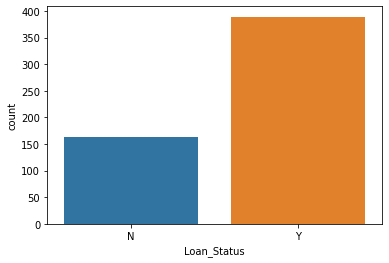

In [24]:
sns.countplot(df['Loan_Status'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

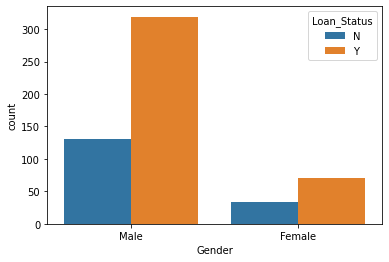

In [25]:
sns.countplot(df['Gender'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

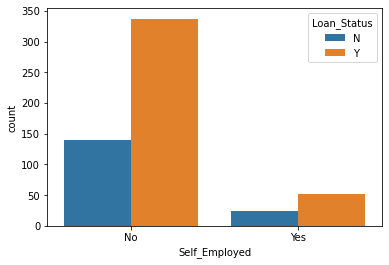

In [26]:
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

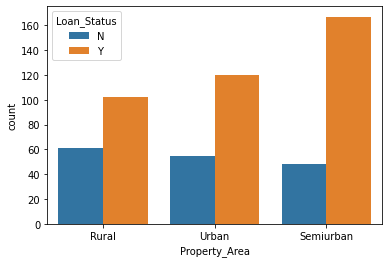

In [27]:
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

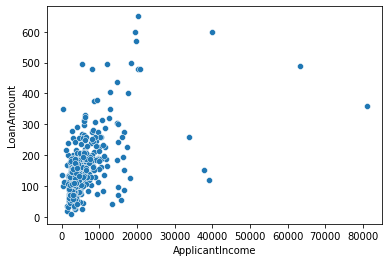

In [28]:
sns.scatterplot(df['ApplicantIncome'],df['LoanAmount'])

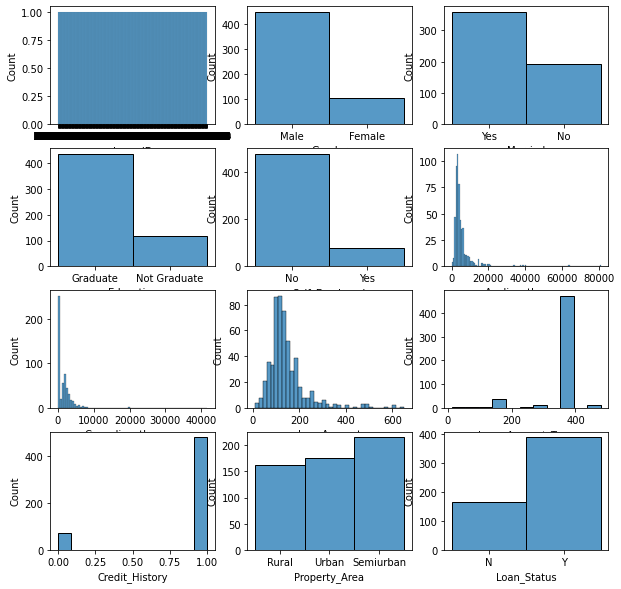

In [29]:
plt.figure(figsize=(10,10))
count=1
for i in df:
    plt.subplot(4,3,count)
    sns.histplot(x=df[i],data=df)
    count+=1

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

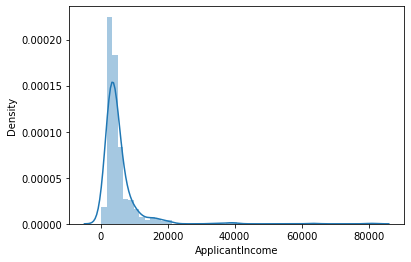

In [30]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>

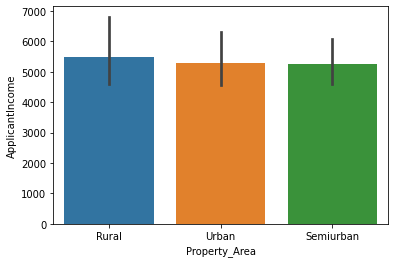

In [31]:
sns.barplot(df['Property_Area'],df['ApplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

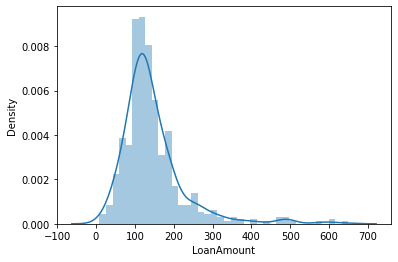

In [32]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:>

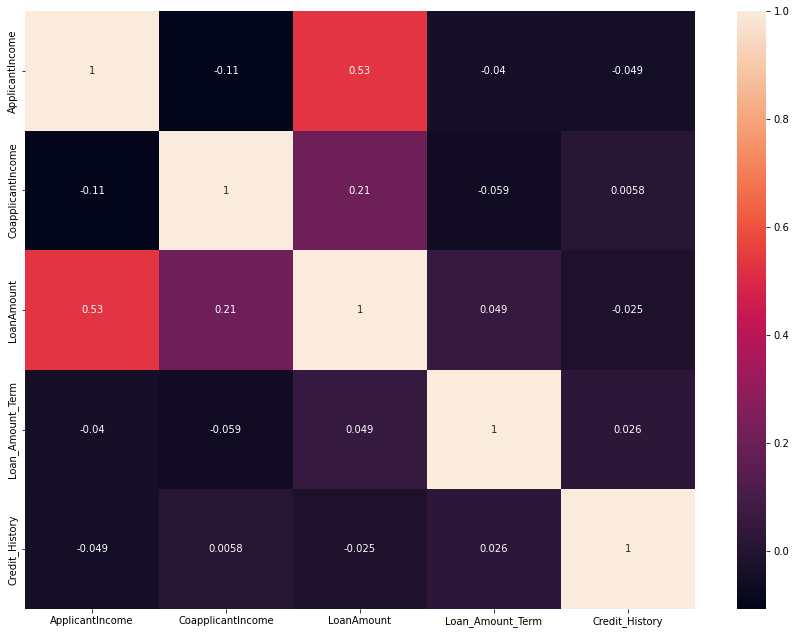

In [33]:
plt.figure(figsize=(15,11))
sns.heatmap(df.corr(),annot=True)

# LabelEncoder

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()

In [36]:
cat_col=df.select_dtypes(include='O').columns
cat_col

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [37]:
for i in cat_col:
    df[i]=le.fit_transform(df[i])

In [38]:
df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [39]:
x=df.drop('Loan_Status',axis=1)
x

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,1,0,1,3000,0.0,66.0,360.0,1.0,2
3,2,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2
4,3,1,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,4,1,1,0,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,548,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,549,1,1,0,0,4106,0.0,40.0,180.0,1.0,0
611,550,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,551,1,1,0,0,7583,0.0,187.0,360.0,1.0,2


In [40]:
y=df['Loan_Status']
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int32

# train_test_split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [43]:
X_train.shape

(442, 11)

In [44]:
X_test.shape

(111, 11)

In [45]:
y_train.shape

(442,)

In [46]:
y_test.shape

(111,)

# LogisticRegression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [48]:
def my_model(clf):
    clf.fit(X_train,y_train)
    y_train_pred=clf.predict(X_train)
    y_test_pred=clf.predict(X_test)
    print('Train Data')
    print(classification_report(y_train,y_train_pred))
    print('Test Data')
    print(classification_report(y_test,y_test_pred))

In [49]:
lr=LogisticRegression()

In [50]:
my_model(lr)

Train Data
              precision    recall  f1-score   support

           0       0.85      0.38      0.53       133
           1       0.79      0.97      0.87       309

    accuracy                           0.79       442
   macro avg       0.82      0.68      0.70       442
weighted avg       0.80      0.79      0.77       442

Test Data
              precision    recall  f1-score   support

           0       0.62      0.42      0.50        31
           1       0.80      0.90      0.85        80

    accuracy                           0.77       111
   macro avg       0.71      0.66      0.67       111
weighted avg       0.75      0.77      0.75       111



# DecisionTreeClassifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt=DecisionTreeClassifier()

In [53]:
dt

DecisionTreeClassifier()

In [54]:
my_model(dt)

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00       309

    accuracy                           1.00       442
   macro avg       1.00      1.00      1.00       442
weighted avg       1.00      1.00      1.00       442

Test Data
              precision    recall  f1-score   support

           0       0.49      0.55      0.52        31
           1       0.82      0.78      0.79        80

    accuracy                           0.71       111
   macro avg       0.65      0.66      0.66       111
weighted avg       0.72      0.71      0.72       111



In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
param_grid={
    'criterion':['gini','entropy'],
    'class_weight':[None,'balanced'],
    'max_depth':np.arange(2,50),
    'min_samples_split':np.arange(2,50,2),
    'min_samples_leaf':np.arange(2,50)
}

In [57]:
dt_rcv=RandomizedSearchCV(dt,param_distributions=param_grid,n_iter=10,scoring='f1',n_jobs=-1)

In [58]:
dt_rcv.fit(X_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])},
                   scoring='f1')

In [59]:
dt_rcv.best_params_

{'min_samples_split': 12,
 'min_samples_leaf': 41,
 'max_depth': 29,
 'criterion': 'entropy',
 'class_weight': None}

In [60]:
dt1=DecisionTreeClassifier(criterion='gini',class_weight='balanced',max_depth=39,min_samples_split=18,min_samples_leaf=7)

In [61]:
my_model(dt1)

Train Data
              precision    recall  f1-score   support

           0       0.65      0.89      0.75       133
           1       0.94      0.79      0.86       309

    accuracy                           0.82       442
   macro avg       0.80      0.84      0.81       442
weighted avg       0.85      0.82      0.83       442

Test Data
              precision    recall  f1-score   support

           0       0.42      0.71      0.53        31
           1       0.85      0.62      0.72        80

    accuracy                           0.65       111
   macro avg       0.64      0.67      0.62       111
weighted avg       0.73      0.65      0.67       111



# RandomForestClassifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf=RandomForestClassifier()

In [64]:
my_model(rf)

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00       309

    accuracy                           1.00       442
   macro avg       1.00      1.00      1.00       442
weighted avg       1.00      1.00      1.00       442

Test Data
              precision    recall  f1-score   support

           0       0.71      0.55      0.62        31
           1       0.84      0.91      0.87        80

    accuracy                           0.81       111
   macro avg       0.77      0.73      0.75       111
weighted avg       0.80      0.81      0.80       111



In [65]:
rf_rcv=RandomizedSearchCV(rf,param_distributions=param_grid,n_iter=10,scoring='f1',n_jobs=-1)

In [66]:
rf_rcv.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])},
                   scoring='f1')

In [67]:
rf_rcv.best_params_

{'min_samples_split': 38,
 'min_samples_leaf': 3,
 'max_depth': 27,
 'criterion': 'gini',
 'class_weight': None}

In [68]:
rf1=RandomForestClassifier(criterion='gini',class_weight='balanced',max_depth=31,min_samples_split=8,min_samples_leaf=28)

In [69]:
my_model(rf1)

Train Data
              precision    recall  f1-score   support

           0       0.62      0.69      0.65       133
           1       0.86      0.82      0.84       309

    accuracy                           0.78       442
   macro avg       0.74      0.75      0.74       442
weighted avg       0.79      0.78      0.78       442

Test Data
              precision    recall  f1-score   support

           0       0.45      0.68      0.54        31
           1       0.84      0.68      0.75        80

    accuracy                           0.68       111
   macro avg       0.65      0.68      0.64       111
weighted avg       0.73      0.68      0.69       111



# AdaBoostClassifier

In [70]:
from sklearn.ensemble import AdaBoostClassifier

In [71]:
adb=AdaBoostClassifier(n_estimators=450)

In [72]:
my_model(adb)

Train Data
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       133
           1       0.92      0.98      0.95       309

    accuracy                           0.93       442
   macro avg       0.93      0.89      0.91       442
weighted avg       0.93      0.93      0.93       442

Test Data
              precision    recall  f1-score   support

           0       0.62      0.65      0.63        31
           1       0.86      0.85      0.86        80

    accuracy                           0.79       111
   macro avg       0.74      0.75      0.75       111
weighted avg       0.79      0.79      0.79       111



In [73]:
param_grid_ada={
    'learning_rate':[0.1,0.01,1,2,3],
    'n_estimators':[50,100,150]
}

In [76]:
adb_rcv=RandomizedSearchCV(adb,param_distributions=param_grid_ada,n_iter=10,scoring='f1',n_jobs=-1)

In [77]:
adb_rcv.fit(X_train,y_train)

RandomizedSearchCV(estimator=AdaBoostClassifier(n_estimators=450), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.01, 1, 2, 3],
                                        'n_estimators': [50, 100, 150]},
                   scoring='f1')

In [78]:
adb_rcv.best_params_

{'n_estimators': 50, 'learning_rate': 0.01}

In [81]:
adb1=AdaBoostClassifier(n_estimators=50,learning_rate=1)

In [82]:
my_model(adb1)

Train Data
              precision    recall  f1-score   support

           0       0.89      0.57      0.70       133
           1       0.84      0.97      0.90       309

    accuracy                           0.85       442
   macro avg       0.87      0.77      0.80       442
weighted avg       0.86      0.85      0.84       442

Test Data
              precision    recall  f1-score   support

           0       0.70      0.61      0.66        31
           1       0.86      0.90      0.88        80

    accuracy                           0.82       111
   macro avg       0.78      0.76      0.77       111
weighted avg       0.81      0.82      0.82       111



# Best Prediction is given by AdaBoost Classifier model.